In [15]:
import numpy as np
from matplotlib import pyplot as plt



In [16]:
real_f = np.load('./naive(toronto)/unbalanced/regression.npy')
noisy_f = np.load('./naive(montreal)/unbalanced/sim_regression.npy')
ideal_f = np.load('./naive(montreal)/unbalanced/ideal_regression.npy')
x = np.array([0, 1, 2, 3])
y = np.array([-1, 1, 1, 1])

In [17]:
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.fontsize']= 'small'

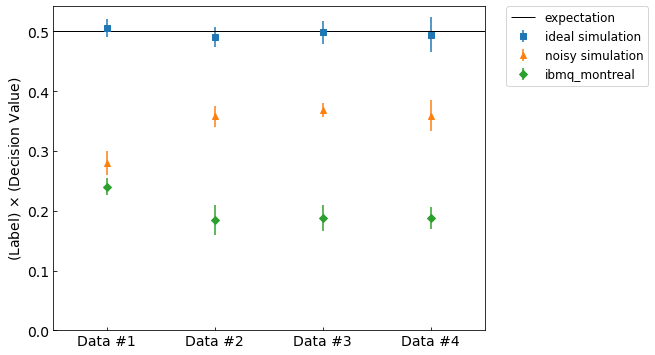

In [18]:


fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
ax.errorbar(x, y*ideal_f.mean(axis=0), yerr=ideal_f.std(axis=0), linestyle='none', marker='s', label='ideal simulation')
ax.errorbar(x, y*noisy_f.mean(axis=0), yerr=noisy_f.std(axis=0), linestyle='none', marker='^', label='noisy simulation')
ax.errorbar(x, y*real_f.mean(axis=0), yerr=real_f.std(axis=0), linestyle='none', marker='D', label='ibmq_montreal')
ax.hlines(0.5, -0.5, 3.5, linewidth=1, color='k', label='expectation')
ax.set_xticks(x)
ax.set_xticklabels([f'Data #{i+1}' for i in range(4)])
ax.set_xlim([-.5, 3.5])
ax.set_ylim([None if min(y*real_f.mean(axis=0))<0 else 0, None])
ax.set_ylabel(r'(Label) $\times$ (Decision Value)')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)

plt.show()
#fig.savefig('/home/quic/Desktop/result_unbalanced', dpi=200)

In [25]:
import dill

with open('./naive(toronto)/balanced/qasvm', 'rb') as f:
    qasvm = dill.load(f)
qasvm

Dual_QASVM (C=None, k=1)
Circuit Class: Bloch_sphere_QASVM_circuit
QuantumInstance: 
Qiskit Terra version: 0.17.2
Backend: 'ibmq_toronto (<AccountProvider for IBMQ(hub='ibm-q-kaist', group='internal', project='reservations')>)', with following setting:
{'basis_gates': ['id', 'rz', 'sx', 'x', 'cx', 'reset'], 'coupling_map': [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]}
{'initial_layout': Layout({
13: Qubit(QuantumRegister(1, 'a'), 0),
10: Qubit(QuantumRegister(2, 'i'), 0),
7: Qubit(QuantumRegister(2, 'i'), 1),
12: Qubit

In [26]:
from qiskit.providers.aer import AerSimulator
backend = qasvm.quantum_instance.backend
fake_backend = AerSimulator.from_backend(backend)

In [27]:
fake_backend.properties().to_dict()

{'backend_name': 'ibmq_toronto',
 'backend_version': '1.4.30',
 'last_update_date': datetime.datetime(2021, 6, 29, 15, 28, 31, tzinfo=tzlocal()),
 'qubits': [[{'date': datetime.datetime(2021, 6, 29, 13, 22, 53, tzinfo=tzlocal()),
    'name': 'T1',
    'unit': 'us',
    'value': 89.71555071099147},
   {'date': datetime.datetime(2021, 6, 29, 13, 24, 54, tzinfo=tzlocal()),
    'name': 'T2',
    'unit': 'us',
    'value': 52.28733925597862},
   {'date': datetime.datetime(2021, 6, 29, 15, 28, 31, tzinfo=tzlocal()),
    'name': 'frequency',
    'unit': 'GHz',
    'value': 5.224961397178612},
   {'date': datetime.datetime(2021, 6, 29, 15, 28, 31, tzinfo=tzlocal()),
    'name': 'anharmonicity',
    'unit': 'GHz',
    'value': -0.33434735824128314},
   {'date': datetime.datetime(2021, 6, 29, 13, 20, 39, tzinfo=tzlocal()),
    'name': 'readout_error',
    'unit': '',
    'value': 0.039000000000000035},
   {'date': datetime.datetime(2021, 6, 29, 13, 20, 39, tzinfo=tzlocal()),
    'name': 'prob_me